In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

匯入一筆資料，每筆資料皆有一個x,y值

In [4]:
#Loading training data
data = pd.read_csv('regression.csv')
data

,X,y
0,1.394330,591
1,1.110690,539
2,0.095543,413
3,-1.591390,310
4,-0.844961,308
5,0.931547,519
6,-1.382390,325
7,-1.740680,332
8,0.468759,498
9,0.737474,498


將x、y值個別取出

In [5]:
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

In [6]:
data.corr() #相關係數

,X,y
X,1.000000,0.949494
y,0.949494,1.000000


- 目的：尋找這筆資料的回歸線
- 方法：theta為回歸線的係數(theta1:斜率(係數),theta0:高度(截距))，從[0,0]開始慢慢找，用每點與回歸線的距離總和為判斷，找最小值

In [21]:
theta = [0,0] #最初

- h(x) = theta_0 + theta_1*x
- h(x)-y → 平方總和為cost function
         ↘調整theta_0
- (h(x)-y)*x → 調整theta_1

In [22]:
#cost function：點到回歸線的距離總和
def ComputeCost(x,y):
    sum_temp = 0
    for i in range(len(x)):
        h = theta[0]+theta[1]*x[i]
        temp = (h - y[i])**2 
        sum_temp += temp
    return sum_temp/2

In [23]:
ComputeCost(x,y)

1938623.5

用eta=0.01去update theta

In [24]:
eta = 0.01

In [25]:
count = 200
temp = [0,0]
theta0 = [0]
theta1 = [0]
costfunction = [1938623.5]

for iter in range(1, count+1, 1):
    sum_theta_0 = 0
    sum_theta_1 = 0
    for i in range(len(x)):
        h = temp[0]+temp[1]*x[i]
        theta_0 = h-y[i]
        theta_1 = theta_0*x[i]
        sum_theta_0 += theta_0
        sum_theta_1 += theta_1
    theta0.append(temp[0]-eta*sum_theta_0)
    theta1.append(temp[1]-eta*sum_theta_1)
    temp[0] = temp[0]-eta*sum_theta_0
    temp[1] = temp[1]-eta*sum_theta_1
    theta = temp
    costfunction.append(ComputeCost(x,y))

In [26]:
len(costfunction)

201

將跑出的結果存入data frame裡，找costfunction的最小值，從它的index找theta

But 不知如何操作data frame，所以用別的方式解決

In [27]:
theta_data = pd.DataFrame({"theta0":theta0,
                    "theta1":theta1,
                    "cost":costfunction})
# theta_data

In [28]:
min(costfunction)

9543.50038338561

In [29]:
costfunction.index(9543.50038338561)

147

In [30]:
theta_data.iloc[147,0:3]

theta0     429.150060
theta1      93.478800
cost      9543.500383
Name: 147, dtype: float64

Text(0, 0.5, 'y')

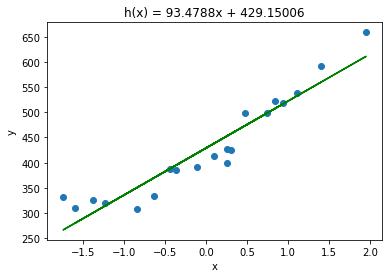

In [31]:
Y = [theta0[147]+theta1[147]*a for a in x]

plt.scatter(x,y)
plt.plot(x,Y,"g-")

plt.title("h(x) = 93.4788x + 429.15006")
plt.xlabel("x")
plt.ylabel("y")

# Test

In [16]:
a = [-3,-1,0,1,4]
b = [6,4,2,0,-8]
temp=[0,0]

sum_theta_0 = 0
sum_theta_1 = 0
for i in range(len(a)):
    h = temp[0]+temp[1]*a[i]
    theta_0 = h-b[i]
    theta_1 = theta_0*a[i]
    sum_theta_0 += theta_0
    sum_theta_1 += theta_1
print(sum_theta_0, sum_theta_1)

-4 54


In [18]:
update_theta_0 = temp[0]-eta*sum_theta_0
update_theta_1 = temp[1]-eta*sum_theta_1
print(update_theta_0, update_theta_1)

0.04 -0.54


# iteration-cost 

調整eta值   (P.24)

In [140]:
eta = 0.01  #large

count = 200
temp = [0,0]
theta0_L = [0]
theta1_L = [0]
costfunction_L = [1938623.5]

for iter in range(1, count+1, 1):
    sum_theta_0 = 0
    sum_theta_1 = 0
    for i in range(len(x)):
        h = temp[0]+temp[1]*x[i]
        theta_0 = h-y[i]
        theta_1 = theta_0*x[i]
        sum_theta_0 += theta_0
        sum_theta_1 += theta_1
    theta0_L.append(temp[0]-eta*sum_theta_0)
    theta1_L.append(temp[1]-eta*sum_theta_1)
    temp[0] = temp[0]-eta*sum_theta_0
    temp[1] = temp[1]-eta*sum_theta_1
    theta = temp
    costfunction_L.append(ComputeCost(x,y))

In [141]:
eta = 0.0005 #suitable

count = 200
temp = [0,0]
theta0_S = [0]
theta1_S = [0]
costfunction_S = [1938623.5]

for iter in range(1, count+1, 1):
    sum_theta_0 = 0
    sum_theta_1 = 0
    for i in range(len(x)):
        h = temp[0]+temp[1]*x[i]
        theta_0 = h-y[i]
        theta_1 = theta_0*x[i]
        sum_theta_0 += theta_0
        sum_theta_1 += theta_1
    theta0_S.append(temp[0]-eta*sum_theta_0)
    theta1_S.append(temp[1]-eta*sum_theta_1)
    temp[0] = temp[0]-eta*sum_theta_0
    temp[1] = temp[1]-eta*sum_theta_1
    theta = temp
    costfunction_S.append(ComputeCost(x,y))

In [142]:
eta = 0.0001 #small

count = 200
temp = [0,0]
theta0_Sm = [0]
theta1_Sm = [0]
costfunction_Sm = [1938623.5]

for iter in range(1, count+1, 1):
    sum_theta_0 = 0
    sum_theta_1 = 0
    for i in range(len(x)):
        h = temp[0]+temp[1]*x[i]
        theta_0 = h-y[i]
        theta_1 = theta_0*x[i]
        sum_theta_0 += theta_0
        sum_theta_1 += theta_1
    theta0_Sm.append(temp[0]-eta*sum_theta_0)
    theta1_Sm.append(temp[1]-eta*sum_theta_1)
    temp[0] = temp[0]-eta*sum_theta_0
    temp[1] = temp[1]-eta*sum_theta_1
    theta = temp
    costfunction_Sm.append(ComputeCost(x,y))

([], <a list of 0 Text yticklabel objects>)

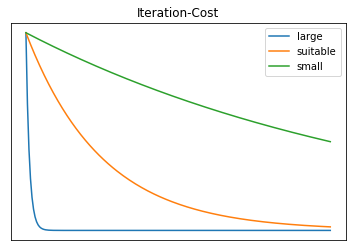

In [155]:
plt.plot(costfunction_L, label="large")
plt.plot(costfunction_S, label="suitable")
plt.plot(costfunction_Sm, label="small")

plt.title("Iteration-Cost")
plt.legend(loc=1)
plt.xticks([])
plt.yticks([])

# 練習：加上二項式

In [46]:
theta = [0,0,1]

In [47]:
def ComputeCost_square(x,y):
    sum_temp = 0
    for i in range(len(x)):
        h = theta[0]+theta[1]*x[i]+theta[2]*(x[i]**2)
        temp = (h - y[i])**2 
        sum_temp += temp
    return sum_temp/2

In [48]:
ComputeCost_square(x, y)

1929649.627214437

In [49]:
eta = 0.01

In [50]:
count = 200
temp = [0,0,1]
theta0 = [0]
theta1 = [0]
theta2 = [1]
costfunction = [1938623.5]

for iter in range(1, count+1, 1):
    sum_theta_0 = 0
    sum_theta_1 = 0
    sum_theta_2 = 1
    for i in range(len(x)):
        h = temp[0]+temp[1]*x[i]+temp[2]*(x[i]**2)
        theta_0 = h-y[i]
        theta_1 = theta_0*x[i]
        theta_2 = theta_0*(x[i]**2)
        sum_theta_0 += theta_0
        sum_theta_1 += theta_1
        sum_theta_2 += theta_2
    theta0.append(temp[0]-eta*sum_theta_0)
    theta1.append(temp[1]-eta*sum_theta_1)
    theta2.append(temp[2]-eta*sum_theta_2)
    temp[0] = temp[0]-eta*sum_theta_0
    temp[1] = temp[1]-eta*sum_theta_1
    temp[2] = temp[2]-eta*sum_theta_2
    theta = temp
    costfunction.append(ComputeCost_square(x,y))

In [51]:
len(costfunction)

201

In [52]:
costfunction.index(min(costfunction))

97

In [53]:
theta_data2 = pd.DataFrame({"theta0":theta0,
                    "theta1":theta1,
                    "theta2":theta2,
                    "cost":costfunction})

In [57]:
theta_data2.iloc[97,:]

theta0     406.035953
theta1      95.082054
theta2      23.092418
cost      3277.858630
Name: 97, dtype: float64

Text(0, 0.5, 'y')

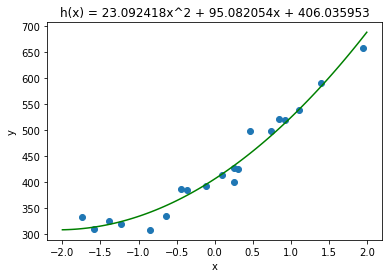

In [65]:
Y = [theta0[97]+theta1[97]*a for a in x]

plt.scatter(x,y)
v = np.linspace(-2,2,100)
plt.plot(v, 23.092418*(v**2)+95.082054*v + 406.035953,"g-")

plt.title("h(x) = 23.092418x^2 + 95.082054x + 406.035953")
plt.xlabel("x")
plt.ylabel("y")